## SUMMARY STATTISTICS

In [7]:
# summary of co
import pandas as pd
df = pd.read_csv('combined_Suchang_Dong.csv')
summary_co=df[df.parameter=='co'].value.agg(['min','mean','median','max'])
print('Summary statistics for co pollutant :\n', summary_co)

Summary statistics for co pollutant :
 min           0.003500
mean        118.418556
median        0.240000
max       10000.000000
Name: value, dtype: float64


In [8]:
# summary of pm10
df = pd.read_csv('combined_Suchang_Dong.csv')
summary_pm10=df[df.parameter=='pm10'].value.agg(['min','mean','median','max'])
print('Summary statistics for pm10 pollutant :\n', summary_pm10)

Summary statistics for pm10 pollutant :
 min           1.000000
mean        140.747123
median       23.000000
max       10000.000000
Name: value, dtype: float64


In [9]:
# summary for pm25
df = pd.read_csv('combined_Suchang_Dong.csv')
summary_pm25=df[df.parameter=='pm25'].value.agg(['min','mean','median','max'])
print('Summary statistics for pm10 pollutant :\n', summary_pm25)

Summary statistics for pm10 pollutant :
 min           0.017000
mean        226.765556
median       10.000000
max       10000.000000
Name: value, dtype: float64


In [10]:
# import pandas
import pandas as pd

# loading data as a dataframe
SU= pd.read_csv('combined_Suchang_Dong.csv')

# display
SU.tail()

,Unnamed: 0,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
8837,8837,2622871,군위읍,pm25,7.0,µg/m³,2024-07-25T20:00:00+00:00,2024-07-26T05:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment
8838,8838,2622871,군위읍,pm25,6.0,µg/m³,2024-07-25T21:00:00+00:00,2024-07-26T06:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment
8839,8839,2622871,군위읍,pm25,5.0,µg/m³,2024-07-25T22:00:00+00:00,2024-07-26T07:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment
8840,8840,2622871,군위읍,pm25,8.0,µg/m³,2024-07-25T23:00:00+00:00,2024-07-26T08:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment
8841,8841,2622871,군위읍,pm25,7.0,µg/m³,2024-07-26T00:00:00+00:00,2024-07-26T09:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment


In [11]:
# sorting time
# type: ignore
SU['time_only'] = SU['datetimeLocal'].str[11:16]
SU['date_only'] = SU['datetimeLocal'].str[0:10]

# subsetting with only columns
SUclean = SU[['parameter','value','unit','time_only','date_only']]
SUclean

,parameter,value,unit,time_only,date_only
0,co,0.27,ppm,08:00,2024-03-20
1,co,0.27,ppm,09:00,2024-03-20
2,co,0.26,ppm,10:00,2024-03-20
3,co,0.25,ppm,11:00,2024-03-20
4,co,0.25,ppm,12:00,2024-03-20
...,...,...,...,...,...
8837,pm25,7.00,µg/m³,05:00,2024-07-26
8838,pm25,6.00,µg/m³,06:00,2024-07-26
8839,pm25,5.00,µg/m³,07:00,2024-07-26
8840,pm25,8.00,µg/m³,08:00,2024-07-26


## Subsetting and Grouping

In [12]:
SUcleanI = SUclean.set_index(['time_only','parameter']).sort_index()
SUcleanI

value   unit   date_only
time_only parameter                          
00:00     co          0.27    ppm  2024-03-21
          co          0.21    ppm  2024-03-23
          co          0.30    ppm  2024-03-24
          co          0.23    ppm  2024-03-25
          co          0.19    ppm  2024-03-26
...                    ...    ...         ...
23:00     pm25        7.00  µg/m³  2024-07-21
          pm25        7.00  µg/m³  2024-07-22
          pm25        4.00  µg/m³  2024-07-23
          pm25        6.00  µg/m³  2024-07-24
          pm25        6.00  µg/m³  2024-07-25

[8842 rows x 3 columns]

In [13]:
## pivot table for all pollutants
pivotSU = SUclean.pivot_table(values='value', index=['time_only', 'parameter'], columns='unit',fill_value=0)
pivotSU

unit                      ppm       µg/m³
time_only parameter                      
00:00     co         0.278871    0.000000
          pm10       0.000000   27.137097
          pm25       0.000000  334.137097
01:00     co         0.248293    0.000000
          pm10       0.000000   26.195122
...                       ...         ...
22:00     pm10       0.000000   31.333333
          pm25       0.000000   92.126984
23:00     co         0.250720    0.000000
          pm10       0.000000   28.880000
          pm25       0.000000   92.480000

[72 rows x 2 columns]

In [14]:
SUcleanD = SUclean.set_index(['date_only','parameter']).sort_index()
SUcleanD

value   unit time_only
date_only  parameter                        
2024-03-20 co          0.27    ppm     08:00
           co          0.27    ppm     09:00
           co          0.26    ppm     10:00
           co          0.25    ppm     11:00
           co          0.25    ppm     12:00
...                     ...    ...       ...
2024-07-26 pm25        7.00  µg/m³     05:00
           pm25        6.00  µg/m³     06:00
           pm25        5.00  µg/m³     07:00
           pm25        8.00  µg/m³     08:00
           pm25        7.00  µg/m³     09:00

[8842 rows x 3 columns]

## Trend Over Time

In [15]:
trendSU =SUclean.pivot_table(values='value', index=['parameter','date_only'], columns='unit',fill_value=0)
trendSU

unit                       ppm        µg/m³
parameter date_only                        
co        2024-03-20  0.280714     0.000000
          2024-03-21  0.256250     0.000000
          2024-03-22  0.229167     0.000000
          2024-03-23  0.272500     0.000000
          2024-03-24  0.271667     0.000000
...                        ...          ...
pm25      2024-07-22  0.000000  1255.500000
          2024-07-23  0.000000     4.250000
          2024-07-24  0.000000     3.708333
          2024-07-25  0.000000     6.083333
          2024-07-26  0.000000     5.700000

[387 rows x 2 columns]

In [16]:
# subsets
pm10Trend = trendSU.xs('pm10', level='parameter')
print(pm10Trend)

coTrend = trendSU.xs('co', level='parameter')
print(coTrend)

pm25Trend = trendSU.xs('pm25', level='parameter')
print(pm25Trend)
pm25Trend.columns

unit        ppm       µg/m³
date_only                  
2024-03-20  0.0   32.090909
2024-03-21  0.0   28.375000
2024-03-22  0.0   36.333333
2024-03-23  0.0   39.333333
2024-03-24  0.0   26.000000
...         ...         ...
2024-07-22  0.0  847.083333
2024-07-23  0.0    9.250000
2024-07-24  0.0   14.875000
2024-07-25  0.0   23.458333
2024-07-26  0.0   18.200000

[129 rows x 2 columns]
unit               ppm  µg/m³
date_only                    
2024-03-20    0.280714    0.0
2024-03-21    0.256250    0.0
2024-03-22    0.229167    0.0
2024-03-23    0.272500    0.0
2024-03-24    0.271667    0.0
...                ...    ...
2024-07-22  833.512083    0.0
2024-07-23    0.156250    0.0
2024-07-24    0.176250    0.0
2024-07-25    0.189583    0.0
2024-07-26    0.169000    0.0

[129 rows x 2 columns]
unit        ppm        µg/m³
date_only                   
2024-03-20  0.0    15.583333
2024-03-21  0.0    16.125000
2024-03-22  0.0     9.916667
2024-03-23  0.0    15.869565
2024-03-24  0.0    10.70

Index(['ppm', 'µg/m³'], dtype='object', name='unit')

### Trend over time for pm25

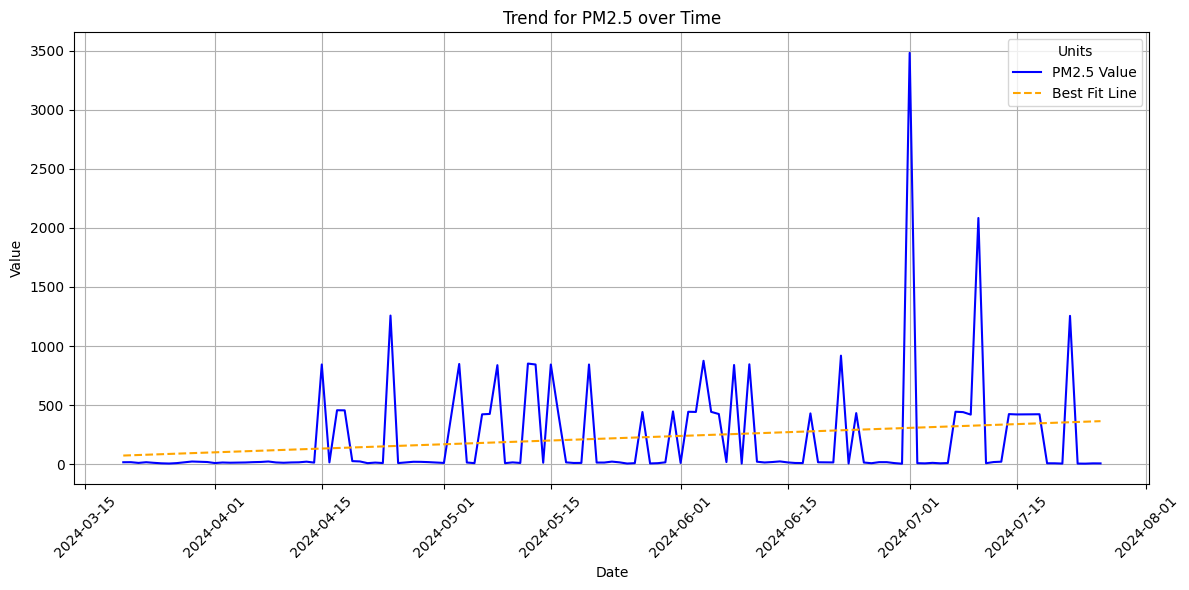

In [19]:
# type:ignore
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
pm25Trend = pm25Trend.reset_index()
pm25Trend['date_only'] = pd.to_datetime(pm25Trend['date_only'])
pm25Trend['date_ordinal'] = pm25Trend['date_only'].map(pd.Timestamp.toordinal)
target_column = 'µg/m³'  
X = pm25Trend[['date_ordinal']]
y = pm25Trend[target_column]

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
pm25Trend['value_pred'] = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pm25Trend['date_only'], pm25Trend[target_column], label='PM2.5 Value', color='blue')
plt.plot(pm25Trend['date_only'], pm25Trend['value_pred'], label='Best Fit Line', color='orange', linestyle='--')
plt.title('Trend for PM2.5 over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Units')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

### Trend over time for pm10

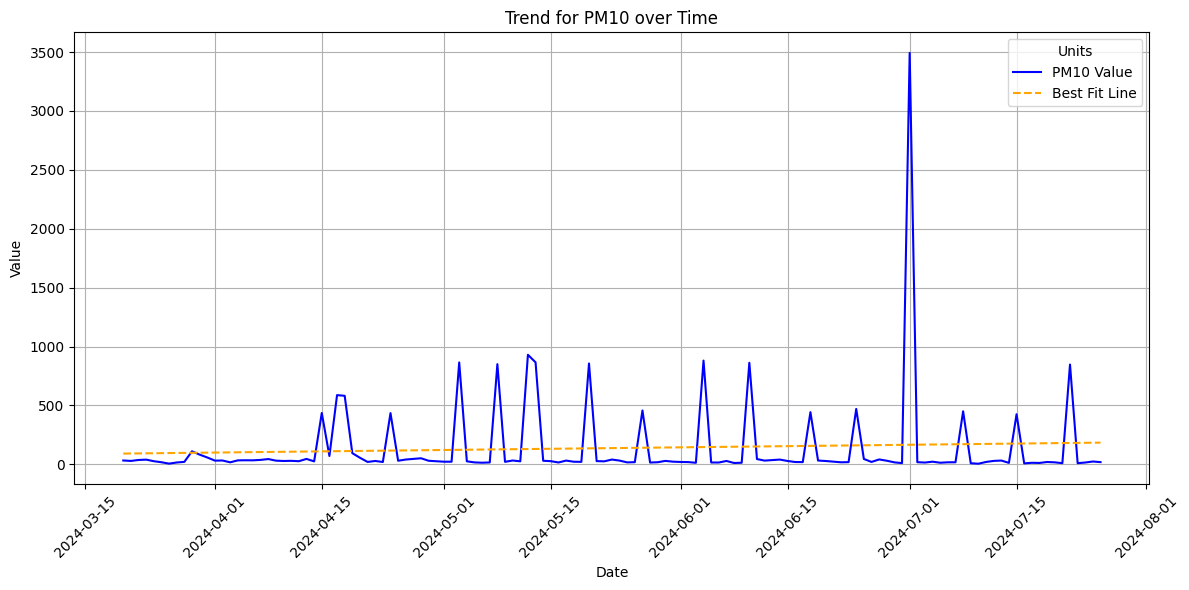

In [20]:
# type:ignore
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
pm10Trend = pm10Trend.reset_index()
pm10Trend['date_only'] = pd.to_datetime(pm10Trend['date_only'])
pm10Trend['date_ordinal'] = pm10Trend['date_only'].map(pd.Timestamp.toordinal)
target_column = 'µg/m³'  
X = pm10Trend[['date_ordinal']]
y = pm10Trend[target_column]

# Perform linear regression
model = LinearRegression()
model.fit(X, y)
pm10Trend['value_pred'] = model.predict(X)

# Plotting
plt.figure(figsize=(12, 6))
plt.plot(pm10Trend['date_only'], pm10Trend[target_column], label='PM10 Value', color='blue')
plt.plot(pm10Trend['date_only'], pm10Trend['value_pred'], label='Best Fit Line', color='orange', linestyle='--')
plt.title('Trend for PM10 over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)
plt.legend(title='Units')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

## Air Quality Index

In [36]:
# load dataset
SU = pd.read_csv('combined_Suchang_Dong.csv')

# convert datetime column to datetime format
SU['datetimeUtc'] = pd.to_datetime(SU['datetimeUtc'])

# Define AQI breakpoints for various pollutants
aqi_breakepoints = {
    'pm25':[
        (0, 12, 0, 50),
        (12.1, 35.4, 51, 100),
        (35.5, 55.4, 101, 150),
        (55.5, 150.4, 151, 200),
        (150.5, 250.4, 201, 300),
        (250.5, 350.4, 301, 400),
        (350.5, 500.4, 401, 500),
    ],
    'pm10':[
               (0, 54, 0, 50),
        (55, 154, 51, 100),
        (155, 254, 101, 150),
        (255, 354, 151, 200),
        (355, 424, 201, 300),
        (425, 504, 301, 400),
        (505, 604, 401, 500),
 
    ],
    'co':[
       (0, 4.4, 0, 50),
        (4.5, 9.4, 51, 100),
        (9.5, 12.4, 101, 150),
        (12.5, 15.4, 151, 200),
        (15.5, 30.4, 201, 300),
        (30.5, 40.4, 301, 400),
        (40.5, 50.4, 401, 500), 
    ]
}

# Function to calculate AQI
def calculate_aqi(concentration, breakpoints):
    for (c_low, c_high, aqi_low, aqi_high) in breakpoints:
        if c_low <= concentration <= c_high:
            return ((aqi_high - aqi_low) / (c_high - c_low)) * (concentration - c_low) + aqi_low
    return None

# Apply the AQI calculation
def get_aqi(row):
    pollutant = row['parameter']
    concentration = row['value']
    if pollutant in aqi_breakepoints:
        return calculate_aqi(concentration, aqi_breakepoints[pollutant])
    return None

SU['AQI'] = SU.apply(get_aqi, axis=1)

# Display the updated dataset with AQI values
SU.head()

,Unnamed: 0,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider,AQI
0,0,2622871,군위읍,co,0.27,ppm,2024-03-19 23:00:00+00:00,2024-03-20T08:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment,3.068182
1,1,2622871,군위읍,co,0.27,ppm,2024-03-20 00:00:00+00:00,2024-03-20T09:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment,3.068182
2,2,2622871,군위읍,co,0.26,ppm,2024-03-20 01:00:00+00:00,2024-03-20T10:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment,2.954545
3,3,2622871,군위읍,co,0.25,ppm,2024-03-20 02:00:00+00:00,2024-03-20T11:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment,2.840909
4,4,2622871,군위읍,co,0.25,ppm,2024-03-20 03:00:00+00:00,2024-03-20T12:00:00+09:00,Asia/Seoul,36.234746,128.57628,1000.0,2000.0,1000.0,Unknown Governmental Organization,Korea Air Ministry of Environment,2.840909


## AQI Distribution

### AQI Histogram

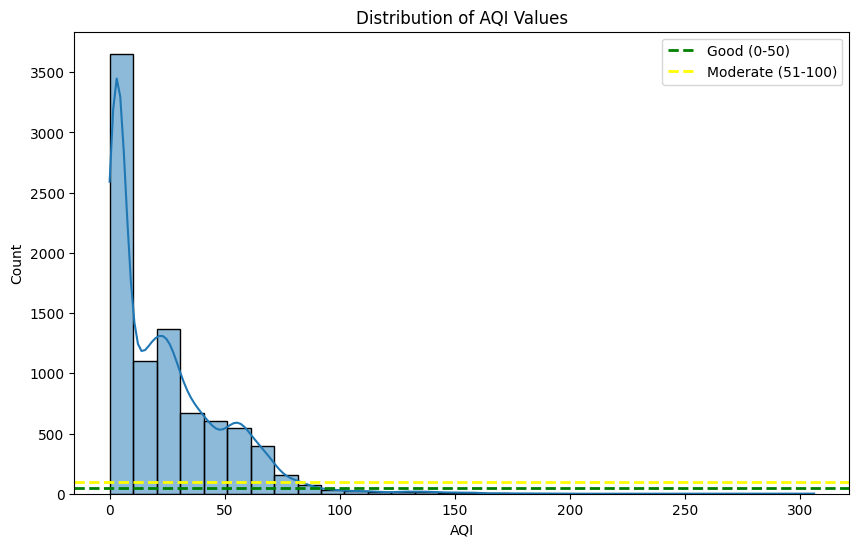

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of AQI values
plt.figure(figsize=(10,6))
sns.histplot(SU['AQI'], kde=True,bins=30)
plt.title('Distribution of AQI Values')
plt.axhline(y=50, color='green', linestyle='--', linewidth=2, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', linewidth=2, label='Moderate (51-100)')
plt.legend()
plt.show()

### AQI Boxplot values by hour

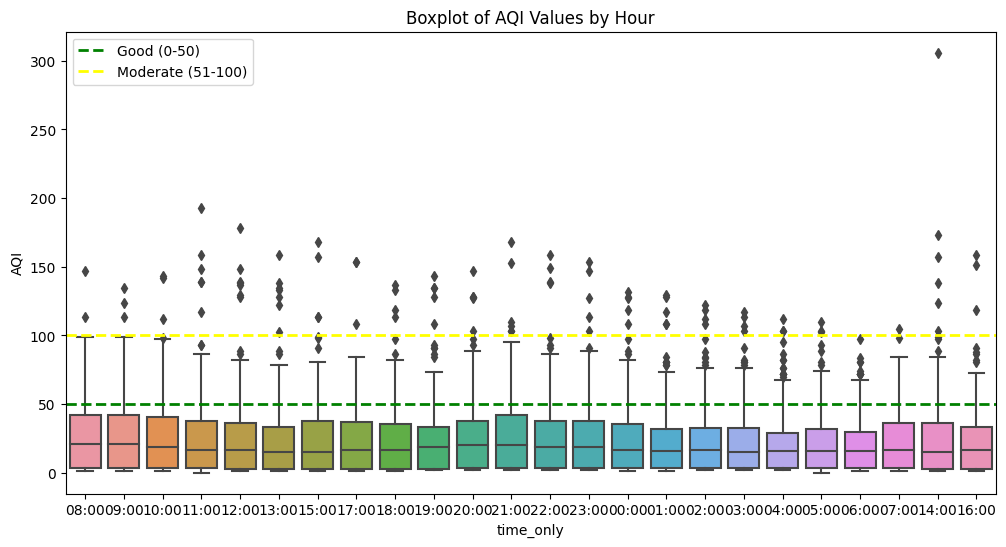

In [41]:
plt.figure(figsize=(12, 6)) 

sns.boxplot(x=SUclean['time_only'], y='AQI', data=SU)
plt.title('Boxplot of AQI Values by Hour')
plt.axhline(y=50, color='green', linestyle='--', linewidth=2, label='Good (0-50)')
plt.axhline(y=100, color='yellow', linestyle='--', linewidth=2, label='Moderate (51-100)')
plt.legend()
plt.show()